In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
from models import *
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, ToTensor, Resize, Normalize

In [2]:
dataset = CIFAR10(root='.', download=True, transform=Compose([Resize(32), ToTensor(), Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]))

Files already downloaded and verified


In [3]:
G = torch.load('cifar10_logan_b/G_25.pth').to('cuda:1').eval()
E = torch.load('cifar10_logan_b/Epost_1.pth').to('cuda:1').eval()

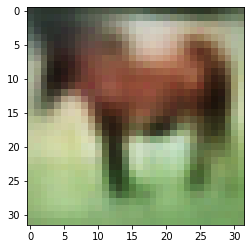

In [4]:
image1 = dataset[7][0].view(1, 3, 32, 32)
latent1 = E(image1.to('cuda:1')).detach()
recon1 = ((G(latent1).cpu().detach())).squeeze().numpy()
plt.imshow((recon1.transpose((1,2,0)) + 1)/2)

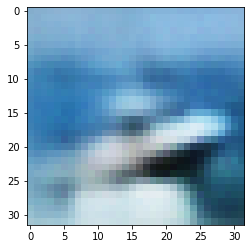

In [5]:
image2 = dataset[8][0].view(1, 3, 32, 32)
latent2 = E(image2.to('cuda:1')).detach()
recon2 = ((G(latent2).cpu().detach())).squeeze().numpy()
plt.imshow((recon2.transpose((1,2,0)) + 1)/2)

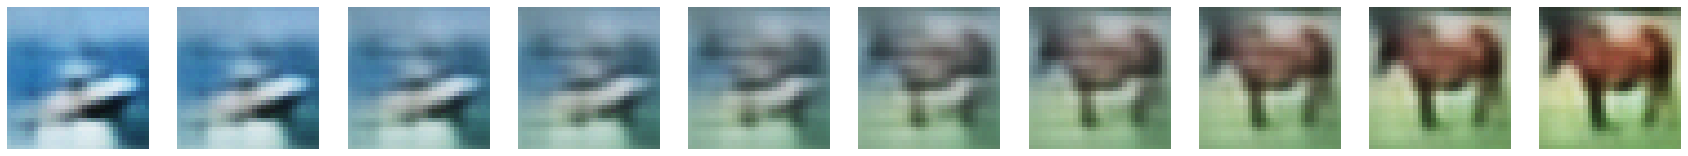

In [6]:
plt.gcf().set_size_inches(30, 7)
pts = np.linspace(0, 1, 10).tolist()
for t in range(len(pts)):
    plt.subplot(2, len(pts), t+1)
    interp_latent = latent1 * pts[t] + latent2 * pts[len(pts)-t-1]
    interp_image = ((G(interp_latent).cpu().detach())).squeeze().numpy()
    plt.imshow((interp_image.transpose((1,2,0)) + 1)/2)
    plt.axis('off')
plt.savefig('logan-b-interp.png')